In [10]:
from pymatgen.io.vasp import Vasprun
import numpy as np
import matplotlib.pyplot as plt


In [119]:
vasprun_file = "../VASP_files/vasprun.xml"
vasprun = Vasprun(vasprun_file)

energy_axis = vasprun.tdos.energies - vasprun.efermi
tot_dos = list(vasprun.tdos.densities.values())[0]
n_Ba = 29
n_Ti = 30
n_layer = n_Ba + n_Ti

In [120]:
def pdos(x):
    """
    Args:
        x (integer): atomic site index

    Returns:
        list: density of states values 
    """
    return list(vasprun.complete_dos.get_site_dos(vasprun.final_structure.sites[x]).densities.values())[0]

layer_dos = np.zeros((n_layer, len(tot_dos)))



In [124]:
# BaO layer
for i in range(1, n_Ti):
    layer_dos[2*i-1] = pdos(i) + pdos(i+(3*n_Ti-1))

# TiO2 layer starts first
for i in range(0, n_Ti):
    layer_dos[2*i] = pdos(i+n_Ba) + pdos(i+(n_Ba+n_Ti)) + pdos(i+(n_Ba+3*n_Ti-1))

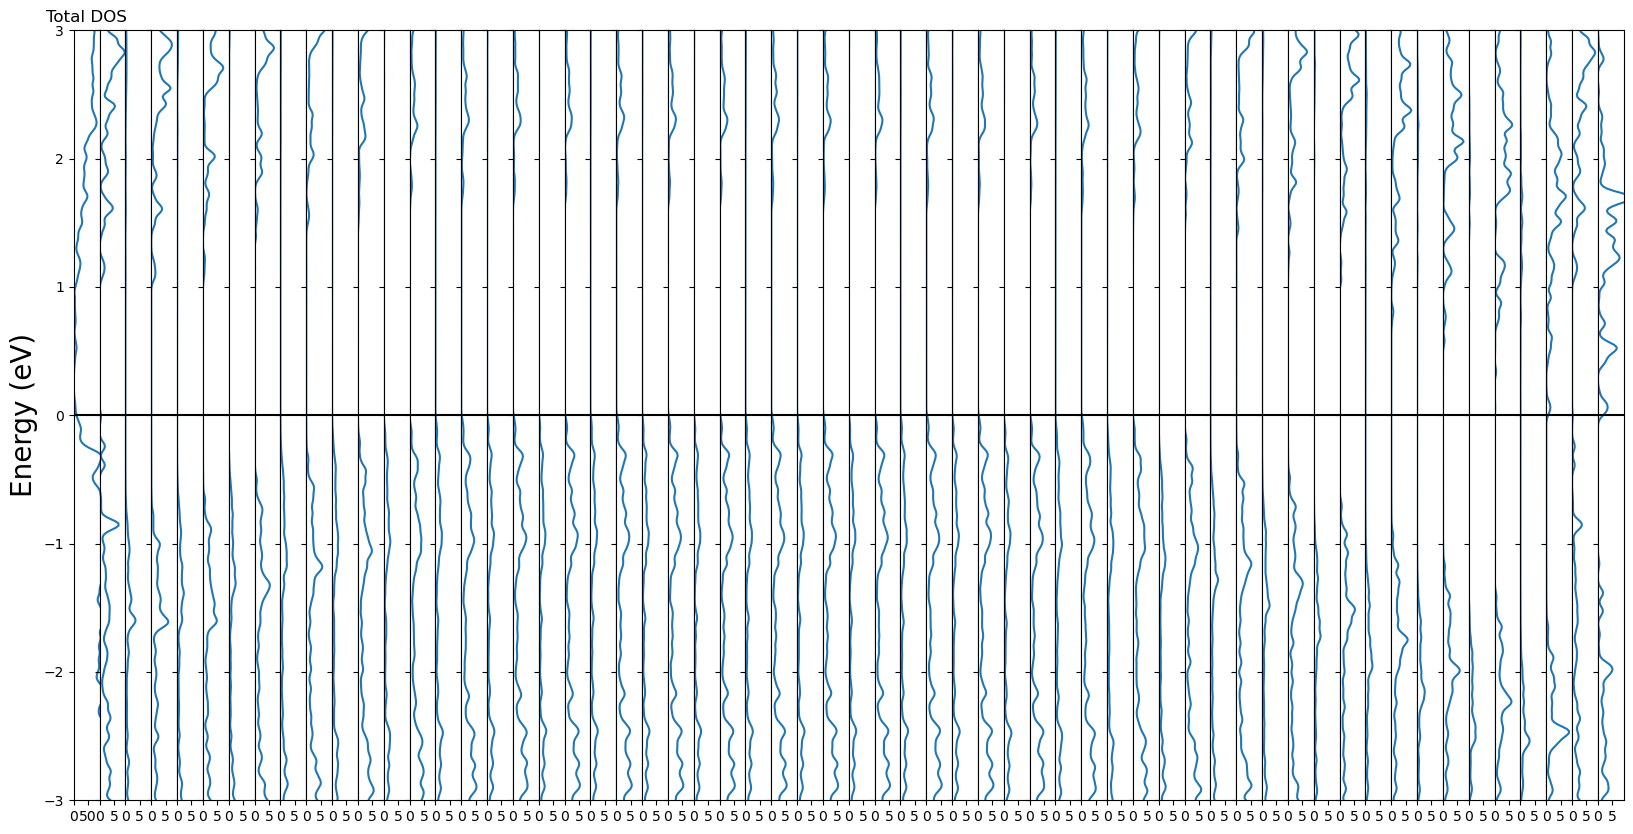

In [125]:
xx = energy_axis
yy = tot_dos

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, n_layer+1, figsize=(20, 10))

# Plot data on each subplot
axs[0].plot(yy, xx)
axs[0].set_title('Total DOS')
axs[0].set_ylim(-3, 3)
axs[0].set_xlim(0, 90)
axs[0].set_ylabel('Energy (eV)', fontsize=20)
axs[0].axhline(0, color='black')  # Add horizontal line at y=0

for i in range(n_layer):
    axs[i+1].plot(layer_dos[i], xx)
    axs[i+1].set_ylim(-3, 3)
    axs[i+1].set_xlim(0, 9)
    axs[i+1].set_yticklabels([])
    axs[i+1].axhline(0, color='black')  # Add horizontal line at y=0


# Adjust the space between subplots
plt.subplots_adjust(wspace=0)

# Display the figure
plt.show()

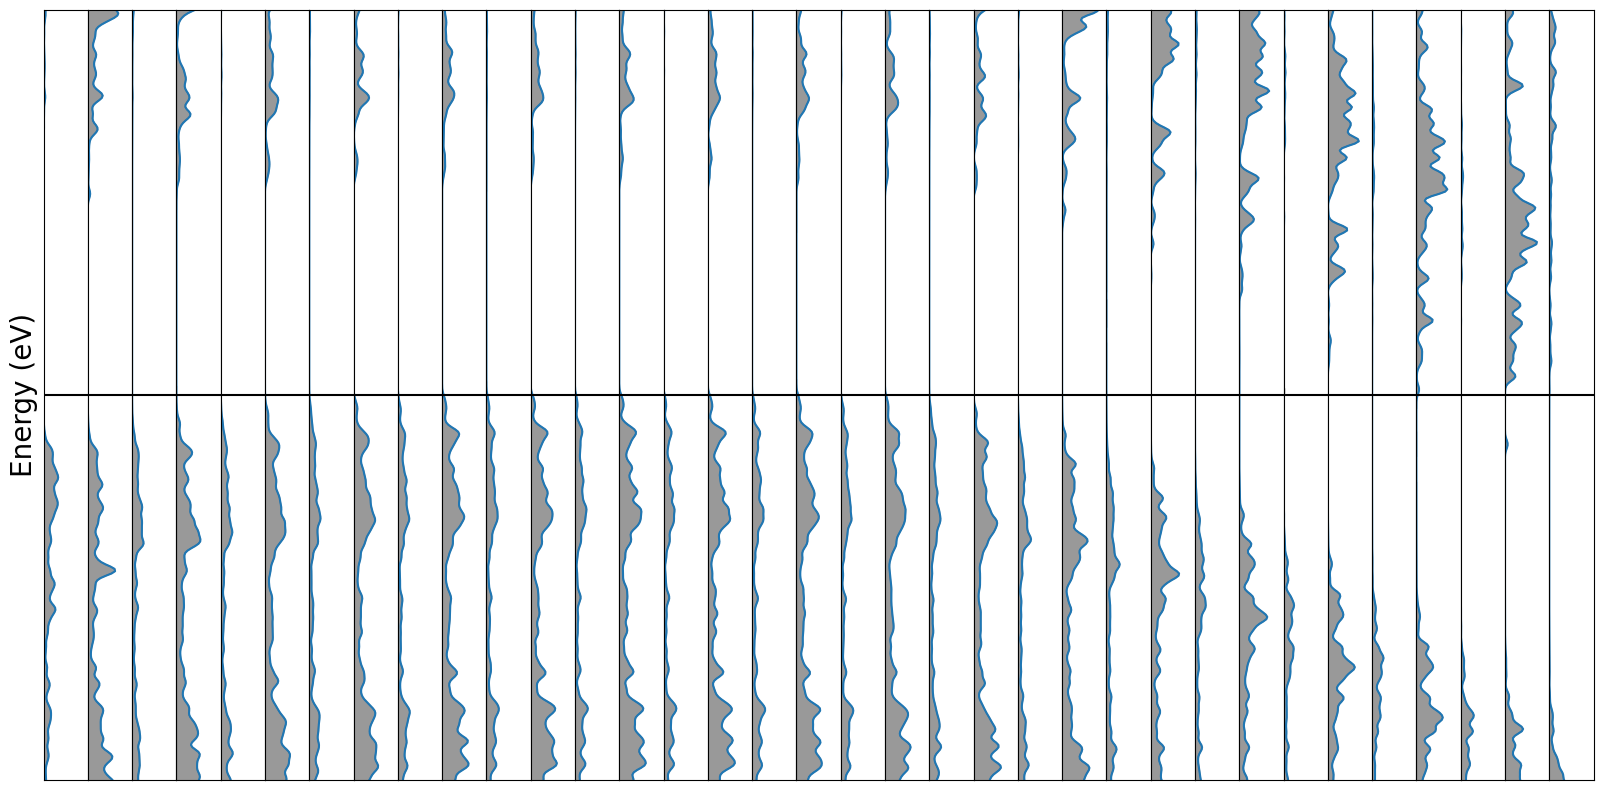

In [188]:
from pymatgen.io.vasp import Vasprun
import numpy as np
import matplotlib.pyplot as plt

vasprun_file = "../VASP_files/vasprun.xml"
vasprun = Vasprun(vasprun_file)

energy_axis = vasprun.tdos.energies - vasprun.efermi
tot_dos = list(vasprun.tdos.densities.values())[0]
n_Ba = 18
n_Ti = 17
n_layer = n_Ba + n_Ti

def pdos(x):
    """
    Args:
        x (integer): atomic site index

    Returns:
        list: density of states values of the atomic site 'x'.
    """
    return list(vasprun.complete_dos.get_site_dos(vasprun.final_structure.sites[x]).densities.values())[0]

layer_dos = np.zeros((n_layer, len(tot_dos)))

# # BaO layer
# for i in range(1, n_Ti):
#     layer_dos[2*i-1] = pdos(i-1) + pdos(i-1+(n_Ba + 2 * n_Ti))

# # TiO2 layer starts first
# for i in range(0, n_Ti):
#     layer_dos[2*i] = pdos(i+n_Ba) + pdos(i+(n_Ba+n_Ti)) + pdos(i+(n_Ba+3*n_Ti-1))
    
#! BaO surface
#!!!!!!!!!!!!!!!!
# BaO layer
for i in range(1, n_Ba):
    layer_dos[2*i-1] = pdos(i+n_Ba-1) + pdos(i+(n_Ba+n_Ti)-1) + pdos(i+(n_Ba+3*n_Ti-1)+1)

# TiO2 layer starts first
for i in range(0, n_Ba):
    layer_dos[2*i] = pdos(i) + pdos(i+(n_Ba + 2 * n_Ti))
#!!!!!!!!!!!!!!!!! 
    
# # H-passivation 
# layer_dos[0] += pdos(29+30+89)
# layer_dos[n_layer-1] += pdos(29+30+89+1)    
    
    
xx = energy_axis
yy = tot_dos

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, n_layer, figsize=(20, 10))

# Plot data on each subplot
axs[0].plot(layer_dos[0], xx)
axs[0].fill_betweenx(xx, 0, layer_dos[0], where=(layer_dos[0] > 0), color='black', alpha=0.4)  # Fill color
axs[0].set_ylim(-3, 3)
axs[0].set_xlim(0, 9)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xticklabels([])
axs[0].set_ylabel('Energy (eV)', fontsize=20)
axs[0].axhline(0, color='black')  # Add horizontal line at y=0

for i in range(1, n_layer):
    axs[i].plot(layer_dos[i], xx)
    axs[i].fill_betweenx(xx, 0, layer_dos[i], where=(layer_dos[i] > 0), color='black', alpha=0.4)  # Fill color
    axs[i].set_ylim(-3, 3)
    axs[i].set_xlim(0, 9)
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].axhline(0, color='black')  # Add horizontal line at y=0


# Adjust the space between subplots
plt.subplots_adjust(wspace=0)

# Display the figure
plt.show()


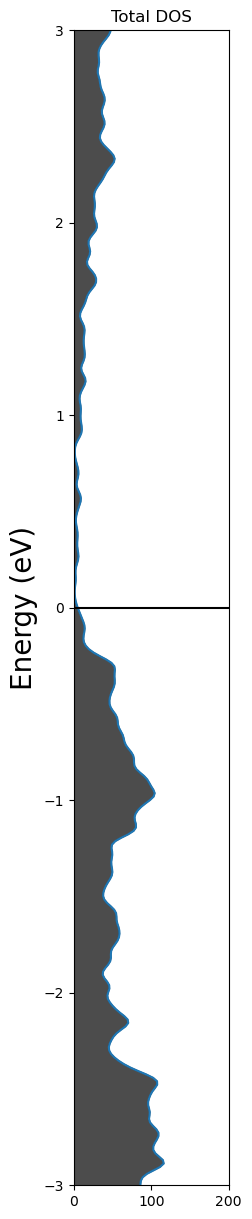

In [186]:
plt.figure(figsize=(2, 15))  # Set the figure size
plt.plot(yy, xx)
plt.title('Total DOS')
plt.fill_betweenx(xx, 0, yy, where=(yy > 0), color='black', alpha=0.7)  # Fill color
plt.ylim(-3, 3)
plt.xlim(0, 200)
plt.ylabel('Energy (eV)', fontsize=20)
plt.axhline(0, color='black')  # Add horizontal line at y=0


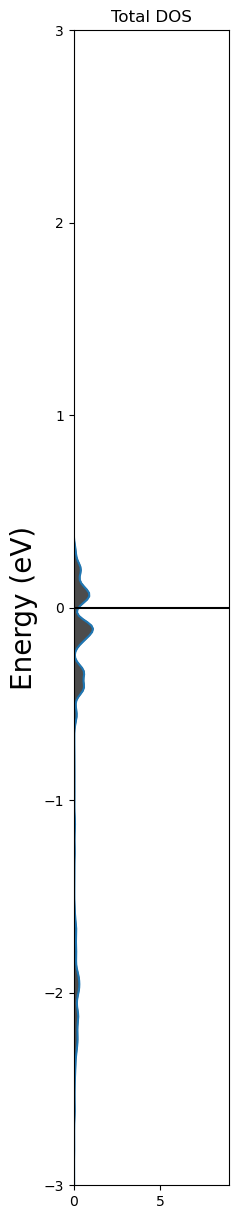

In [179]:
yy = pdos(29+30+89)
plt.figure(figsize=(2, 15))  # Set the figure size
plt.plot(yy, xx)
plt.title('Total DOS')
plt.fill_betweenx(xx, 0, yy, where=(yy > 0), color='black', alpha=0.7)  # Fill color
plt.ylim(-3, 3)
plt.xlim(0, 9)
plt.ylabel('Energy (eV)', fontsize=20)
plt.axhline(0, color='black')  # Add horizontal line at y=0
